# Data importing and data cleaning

In [1]:
from google.colab import drive
import os
import pandas as pd

In [ ]:
df1 = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_biometric_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_biometric_1000000_1500000.csv")
df4 = pd.read_csv("api_data_aadhar_biometric_1500000_1861108.csv")

final_df = pd.concat([df1,df2,df3,df4], axis=0, ignore_index=True)

# final_df.to_csv(os.path.join(drive,"final_data.csv"), index=False)
final_df.to_csv("final_data.csv", index=False)

In [ ]:
final_df

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1861103,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
1861104,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
1861105,29-12-2025,West Bengal,West Midnapore,721304,0,3
1861106,29-12-2025,West Bengal,West Midnapore,721451,2,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


### Normalizing states and districts name

In [ ]:
final_df["state_clean"] = (
    final_df["state"]
    .astype(str)
    .str.strip()          # remove extra spaces
    .str.replace(r"\s+", " ", regex=True)  # fix double spaces
    .str.title()          # consistent capitalization
)

In [ ]:
final_df['state_clean'] = final_df['state_clean'].replace({
    "100000":"Lakshadweep",
    "Andaman & Nicobar Islands":"Andaman And Nicobar Islands",
    "Dadra & Nagar Haveli": "Dadra And Nagar Haveli",
    "Daman & Diu": "Daman And Diu",
    "Jammu & Kashmir": "Jammu And Kashmir",
    "Orissa": "Odisha",
    "Pondicherry":"Puducherry",
    "The Dadra And Nagar Haveli And Daman And Diu" : "Dadra And Nagar Haveli And Daman And Diu",
    "West Bangal": "West Bengal",
    "Westbengal": "West Bengal",
    "Tamilnadu": "Tamil Nadu",
    "Chhatisgarh": "Chhattisgarh",
    "Uttaranchal": "Uttarakhand"
})

In [ ]:
print(sorted(final_df['state_clean'].unique()))
print(len(final_df['state_clean'].unique()))

['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli', 'Dadra And Nagar Haveli And Daman And Diu', 'Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
38


In [ ]:
final_df["district_clean"] = (
    final_df["district"]
    .astype(str)
    .str.strip()
    .str.replace(r"[–—]", "-", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"[^\w\s\-\(\)]", "", regex=True)
    .str.title()
)

In [ ]:
final_df['district_clean'] = final_df['district_clean'].replace({
    # --- Official Renaming ---
    'Allahabad': 'Prayagraj',
    'Faizabad': 'Ayodhya',
    'Gurgaon': 'Gurugram',
    'Mewat': 'Nuh',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Aurangabad(Bh)': 'Aurangabad', # Distinguishing Bihar's Aurangabad
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Osmanabad': 'Dharashiv',
    'Ahmednagar': 'Ahilyanagar',
    'Ahmadnagar': 'Ahilyanagar',
    'Ahmed Nagar': 'Ahilyanagar',

    # --- Karnataka (Anglicized -> Local) ---
    'Bangalore': 'Bengaluru',
    'Bangalore Rural': 'Bengaluru Rural',
    'Belgaum': 'Belagavi',
    'Bellary': 'Ballari',
    'Bijapur': 'Vijayapura',
    'Bijapur(Kar)': 'Vijayapura',
    'Chikmagalur': 'Chikkamagaluru',
    'Chickmagalur': 'Chikkamagaluru',
    'Gulbarga': 'Kalaburagi',
    'Hospet': 'Vijayanagara',
    'Hubli': 'Hubballi',
    'Mysore': 'Mysuru',
    'Shimoga': 'Shivamogga',
    'Tumkur': 'Tumakuru',

    # --- Spelling/Transliteration Variations ---
    'Ahmadabad': 'Ahmedabad',
    'Baleshwar': 'Balasore', # Or Baleswar, depending on preference
    'Baleswar': 'Balasore',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Baramula': 'Baramulla',
    'Bulandshahar': 'Bulandshahr',
    'Chittaurgarh': 'Chittorgarh',
    'Dantewada': 'Dakshin Bastar Dantewada',
    'Dohad': 'Dahod',
    'Gondiya': 'Gondia',
    'Gondiya ': 'Gondia', # Trailing space handling
    'Hardwar': 'Haridwar',
    'Howrah': 'Haora', # Official census often uses Haora, but Howrah is common
    'Hawrah': 'Haora',
    'Hugli': 'Hooghly',
    'Jajapur': 'Jajpur',
    'Jalo': 'Jalore',
    'Jalor': 'Jalore',
    'Kancheepuram': 'Kanchipuram',
    'Keri': 'Kheri', # Assuming Lakhimpur Kheri
    'Khordha': 'Khorda',
    'Mahabub Nagar': 'Mahabubnagar',
    'Mahbubnagar': 'Mahabubnagar',
    'Medinipur': 'Paschim Medinipur', # Note: Medinipur was split, usually requires context
    'Midnapore': 'Paschim Medinipur',
    'Nabarangapur': 'Nabarangpur',
    'Narsimhapur': 'Narsinghpur',
    'Nasik': 'Nashik',
    'Pondicherry': 'Puducherry',
    'Poona': 'Pune',
    'Purulia': 'Puruliya',
    'Rangareddi': 'Rangareddy',
    'Sipahijala': 'Sepahijala',
    'Sundergarh': 'Sundargarh',
    'Thiruvallur': 'Tiruvallur',
    'Tuticorin': 'Thoothukkudi',
    'Visakhapatanam': 'Visakhapatnam',
    'Y S R': 'YSR Kadapa',
    'Cuddapah': 'YSR Kadapa'
})

In [ ]:
print(final_df['district_clean'].unique())
print(len(final_df['district_clean'].unique()))

['Mahendragarh' 'Madhepura' 'Punch' 'Bhojpur' 'Madurai' 'Ratnagiri'
 'Anand' 'Gandhinagar' 'Dhenkanal' 'Valsad' 'Salem' 'Hooghly'
 'Paschim Medinipur' 'Wayanad' 'Sawai Madhopur' 'Vaishali' 'Karur'
 'Rupnagar' 'Sabarkantha' 'Una' 'Bhilwara' 'Bara Banki' 'Cachar'
 'Dehradun' 'Chamba' 'Shajapur' 'The Nilgiris' 'Wardha' 'Nabarangpur'
 'Shaheed Bhagat Singh Nagar' 'Davangere' 'Dahod' 'Tiruppur'
 'Vizianagaram' 'Moga' 'Rajkot' 'Hyderabad' 'Sundargarh' 'Kurnool'
 'Warangal' 'Tirunelveli' 'South Goa' 'Anantapur' 'Thiruvananthapuram'
 'Srikakulam' 'Nizamabad' 'Cuttack' 'Baran' 'Guntur' 'Mysuru'
 'Purba Medinipur' 'Ernakulam' 'Balaghat' 'Sivaganga' 'Harda '
 'Mokokchung' 'Uttara Kannada' 'Perambalur' 'Udupi' 'Ananthapur'
 'Coimbatore' 'West Singhbhum' 'Tumakuru' 'Birbhum' 'Visakhapatnam'
 'Hardoi' 'Siddharthnagar' 'Dhanbad' 'Darbhanga' 'Jabalpur'
 'North 24 Parganas' 'Leh' 'West Godavari' 'Kaithal' 'Kachchh' 'Krishna'
 'Kannur' 'Shivamogga' 'Bankura' 'Rajsamand' 'Namakkal' 'Thiruvarur'
 'Karimna

### Checking for duplicate rows

In [ ]:
duplicate_rows = final_df[final_df.duplicated(keep=False)]
print(duplicate_rows)
print(len(duplicate_rows))
final_df.duplicated().sum()


final_df["is_duplicate"] = final_df.duplicated(keep="first").astype(int)


final_df["is_duplicate"].value_counts()


               date           state    district  pincode  bio_age_5_17  \
109994   01-09-2025    Chhattisgarh   Kondagaon   494229             0   
109995   01-09-2025    Chhattisgarh   Kondagaon   494230             1   
109996   01-09-2025    Chhattisgarh       Korba   495119             5   
109997   01-09-2025    Chhattisgarh       Korba   495446             0   
109998   01-09-2025    Chhattisgarh       Korba   495674            10   
...             ...             ...         ...      ...           ...   
1860707  29-12-2025  Andhra Pradesh    Prakasam   523327             3   
1860708  29-12-2025  Andhra Pradesh    Prakasam   523368             2   
1860709  29-12-2025  Andhra Pradesh    Prakasam   523370             1   
1860710  29-12-2025  Andhra Pradesh    Prakasam   523371             2   
1860711  29-12-2025  Andhra Pradesh  Rangareddi   500005             2   

         bio_age_17_     state_clean district_clean  
109994             1    Chhattisgarh      Kondagaon  
109

,count
is_duplicate,
0,1766212
1,94896


In [ ]:
final_df.to_csv("final_data.csv", index=False)

----- check point -----

In [ ]:
final_df = pd.read_csv("final_data.csv")
final_df = final_df.query("is_duplicate == 0")

## state vs updates

/tmp/ipython-input-3616552783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='updates', y='state_clean', data=df_sorted, palette='viridis')


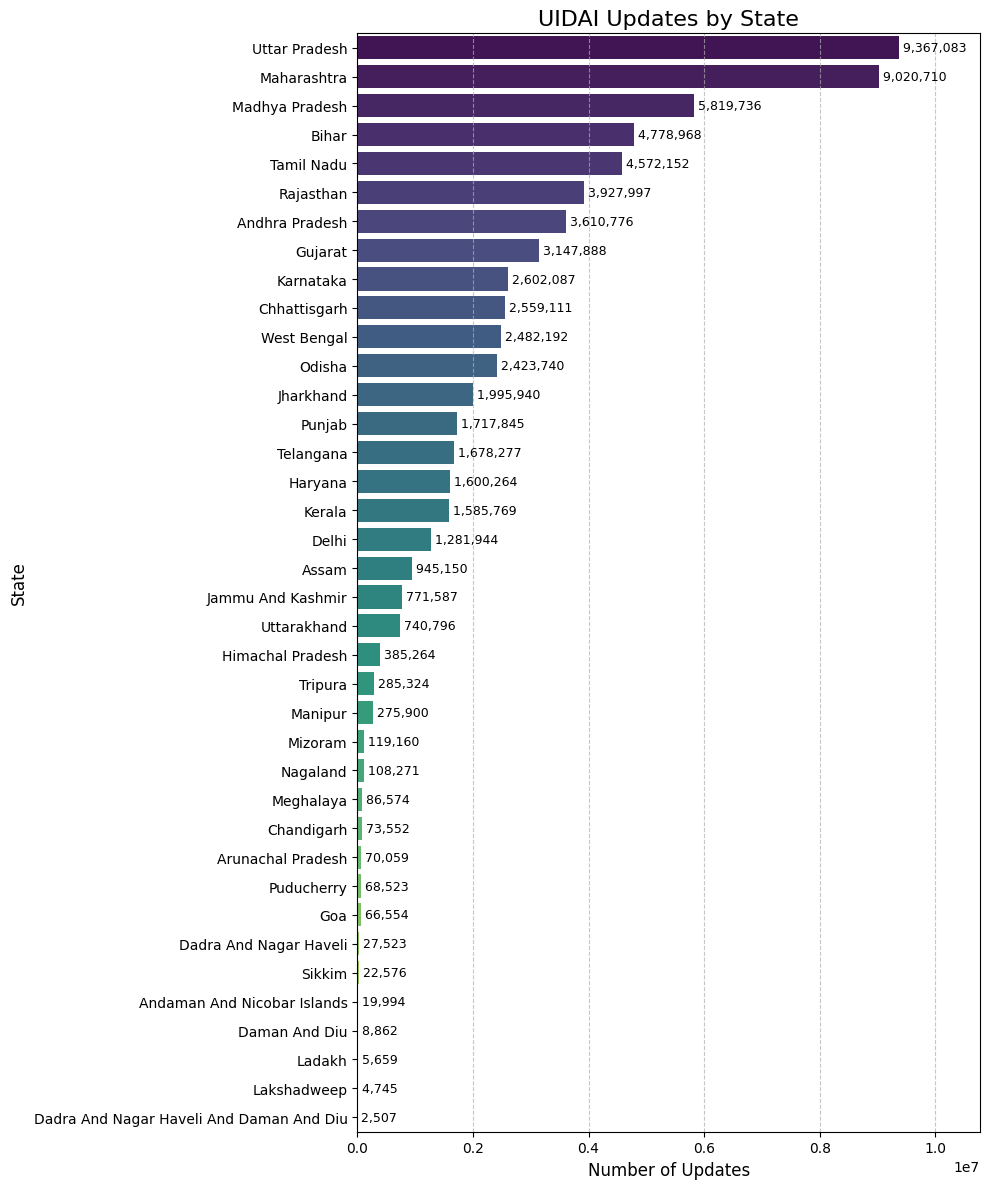

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df['updates'] = final_df['bio_age_5_17'] + final_df['bio_age_17_']
df_sorted = final_df.groupby('state_clean')['updates'].sum().reset_index().sort_values('updates', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='updates', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by State', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['updates']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['updates'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## states vs update (5-17)

/tmp/ipython-input-3512941895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bio_age_5_17', y='state_clean', data=df_sorted, palette='viridis')


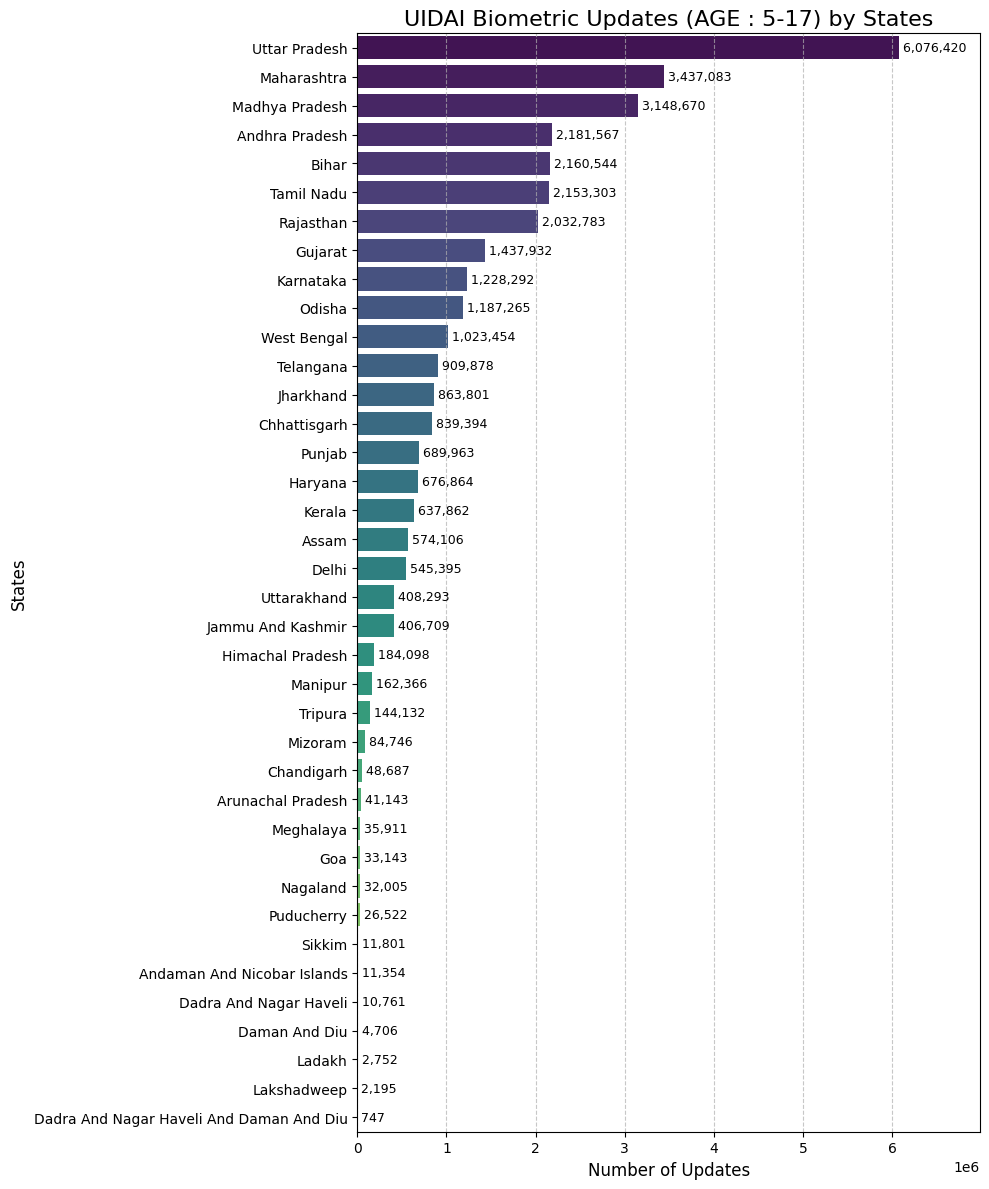

In [ ]:
df_sorted = final_df.groupby('state_clean')['bio_age_5_17'].sum().reset_index().sort_values('bio_age_5_17', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='bio_age_5_17', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Biometric Updates (AGE : 5-17) by States', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['bio_age_5_17']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['bio_age_5_17'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## states vs updates (age 18+ )

/tmp/ipython-input-1640653516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bio_age_17_', y='state_clean', data=df_sorted, palette='viridis')


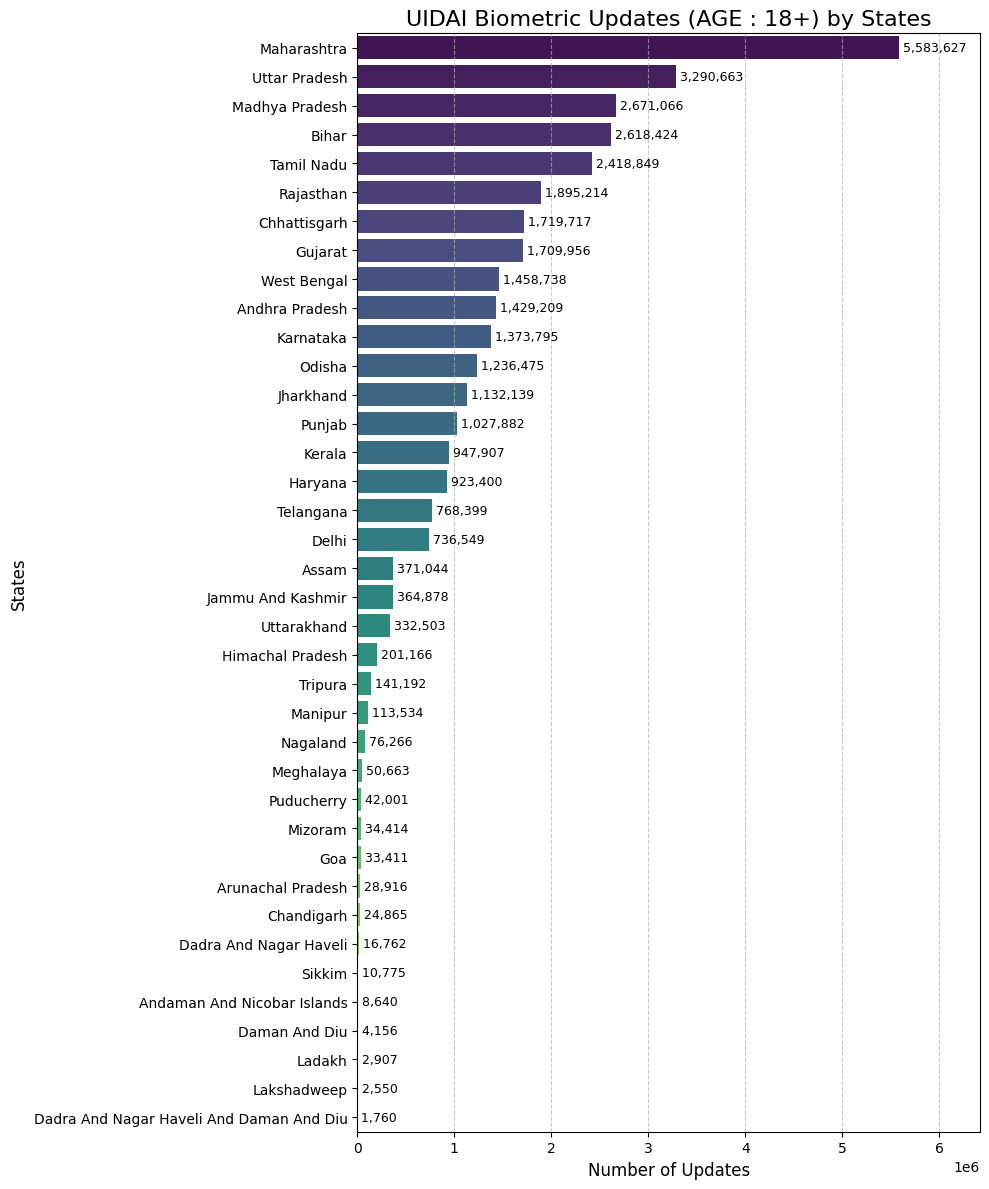

In [ ]:
df_sorted = final_df.groupby('state_clean')['bio_age_17_'].sum().reset_index().sort_values('bio_age_17_', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='bio_age_17_', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Biometric Updates (AGE : 18+) by States', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['bio_age_17_']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['bio_age_17_'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## Districts vs updates  

/tmp/ipython-input-656568161.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='updates', y='district_clean', data=df_sorted, palette='viridis')


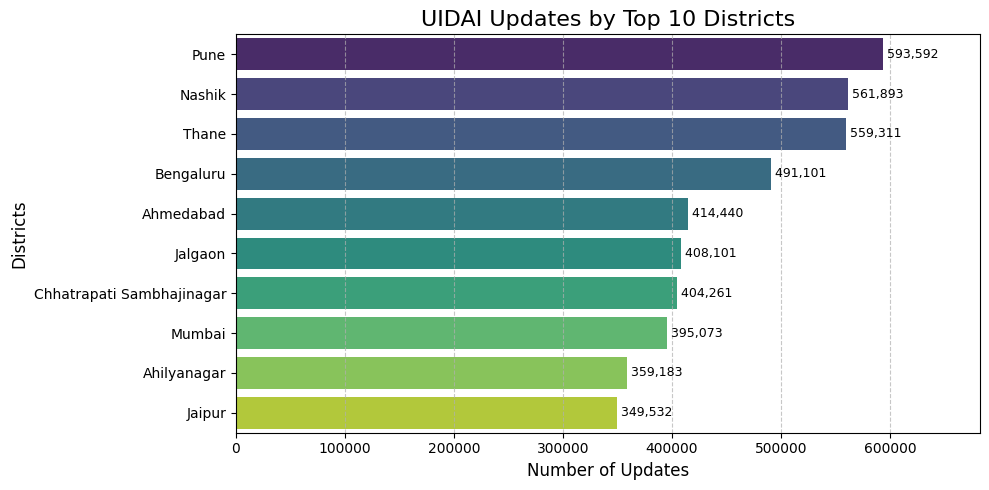

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df['updates'] = final_df['bio_age_5_17'] + final_df['bio_age_17_']
df_sorted = final_df.groupby('district_clean')['updates'].sum().reset_index().sort_values('updates', ascending=False).head(10)

plt.figure(figsize=(10,5))

sns.barplot(x='updates', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by Top 10 Districts', fontsize=16)
plt.xlabel('Number of Updates', fontsize=12)
plt.ylabel('Districts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['updates']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['updates'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_sorted = final_df.groupby('district_clean')['updates'].sum().reset_index().sort_values('updates', ascending=False)
df_sorted

,district_clean,updates
647,Pune,593592
570,Nashik,561893
806,Thane,559311
96,Bengaluru,491101
4,Ahmedabad,414440
...,...,...
491,Mahoba,1
416,Khordha,1
269,Gautam Buddha Nagar,1
146,Chandauli,1


## Districts vs updates (age 5-17)

/tmp/ipython-input-494526186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bio_age_5_17', y='district_clean', data=df_sorted, palette='viridis')


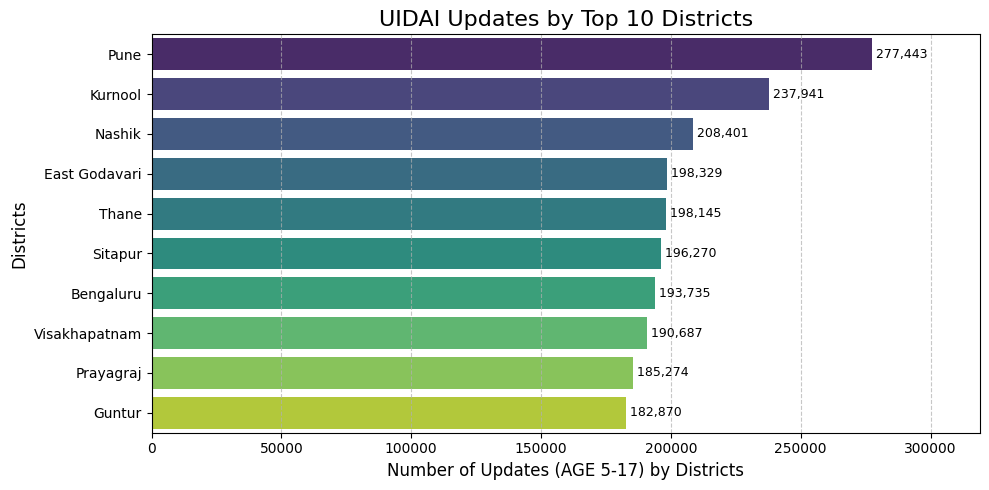

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_sorted = final_df.groupby('district_clean')['bio_age_5_17'].sum().reset_index().sort_values('bio_age_5_17', ascending=False).head(10)

plt.figure(figsize=(10,5))

sns.barplot(x='bio_age_5_17', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by Top 10 Districts', fontsize=16)
plt.xlabel('Number of Updates (AGE 5-17) by Districts', fontsize=12)
plt.ylabel('Districts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['bio_age_5_17']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['bio_age_5_17'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_sorted = final_df.groupby('district_clean')['bio_age_5_17'].sum().reset_index().sort_values('bio_age_5_17', ascending=False)
df_sorted

,district_clean,bio_age_5_17
647,Pune,277443
450,Kurnool,237941
570,Nashik,208401
229,East Godavari,198329
806,Thane,198145
...,...,...
828,Tiswadi,0
827,Tiruvarur,0
307,Hingoli,0
269,Gautam Buddha Nagar,0


## Districts vs updates (18+)

/tmp/ipython-input-3450027541.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bio_age_17_', y='district_clean', data=df_sorted, palette='viridis')


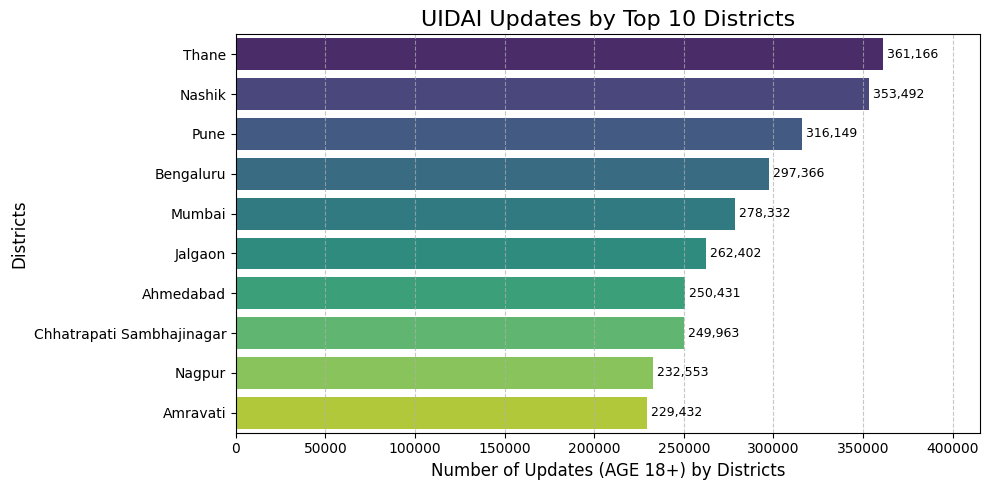

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_sorted = final_df.groupby('district_clean')['bio_age_17_'].sum().reset_index().sort_values('bio_age_17_', ascending=False).head(10)

plt.figure(figsize=(10,5))

sns.barplot(x='bio_age_17_', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Updates by Top 10 Districts', fontsize=16)
plt.xlabel('Number of Updates (AGE 18+) by Districts', fontsize=12)
plt.ylabel('Districts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['bio_age_17_']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['bio_age_17_'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_sorted = final_df.groupby('district_clean')['bio_age_17_'].sum().reset_index().sort_values('bio_age_17_', ascending=False)
df_sorted

,district_clean,bio_age_17_
806,Thane,361166
570,Nashik,353492
647,Pune,316149
96,Bengaluru,297366
535,Mumbai,278332
...,...,...
70,Bandipur,1
7,Akhera,1
43,Auraiya,0
638,Poonch,0


## Age wise Updates analysis

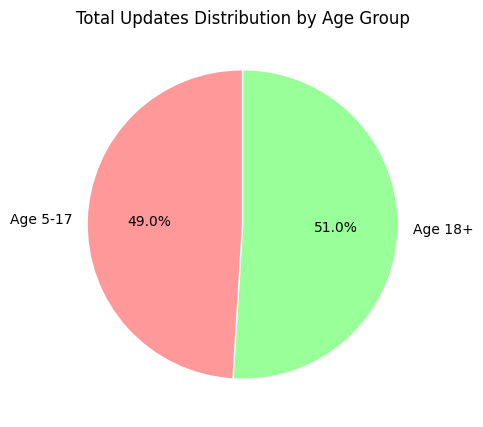

In [ ]:
import matplotlib.pyplot as plt

total_5_18 = final_df['bio_age_5_17'].sum()
total_18_above = final_df['bio_age_17_'].sum()

labels = ['Age 5-17', 'Age 18+']
sizes = [total_5_18, total_18_above]
colors = ['#ff9999', '#99ff99']

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.005, 0.005)
)

plt.title('Total Updates Distribution by Age Group')
plt.show()

## month wise analysis

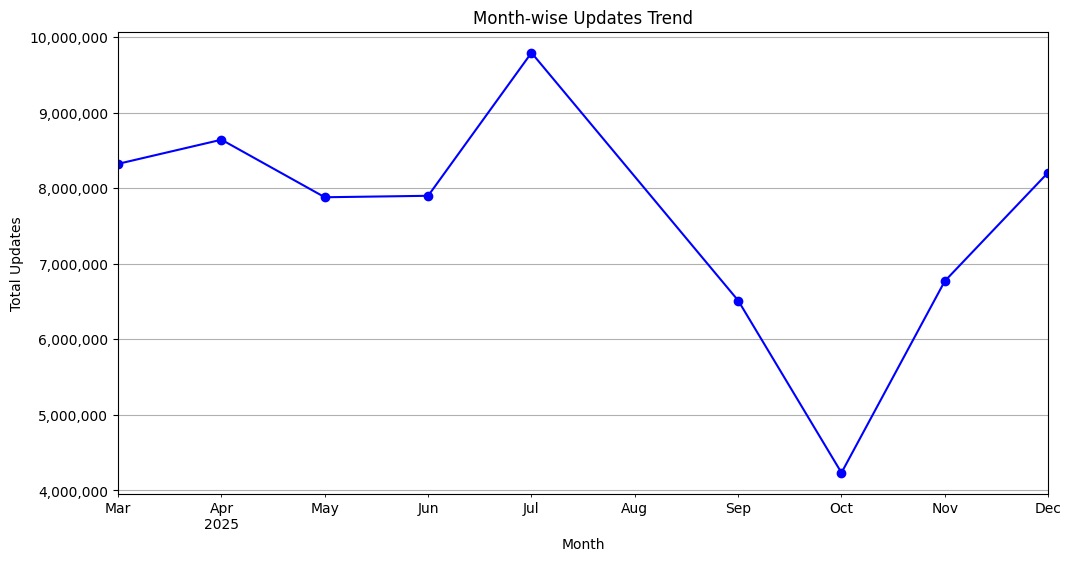

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Convert the 'date' column to real Datetime objects
final_df['date'] = pd.to_datetime(final_df['date'], format='%d-%m-%Y')

# 2. Extract the Month and Year (e.g., "2024-01")
final_df['Month_Year'] = final_df['date'].dt.to_period('M')
final_df['updates'] = final_df['bio_age_5_17'] + final_df['bio_age_17_']

# 3. Group by this new column and sum the enrolments
monthly_data = final_df.groupby('Month_Year')['updates'].sum()

# 4. Plot the Trend
plt.figure(figsize=(12, 6))
ax = monthly_data.plot(kind='line', marker='o', color='b') # 'line' shows trend better

plt.title('Month-wise Updates Trend')
plt.xlabel('Month')
plt.ylabel('Total Updates')
plt.grid(True)
def format_with_commas(x, pos):
    return f'{int(x):,}'
ax.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.show()

## RO wise analysis

In [ ]:
# source : https://uidai.gov.in/en/contact-support/regional-offices.html
# 1. Define the Mapping (State -> Region)
zonal_mapping = {
    # RO Bengaluru
    'Karnataka': 'RO Bengaluru',
    'Kerala': 'RO Bengaluru',
    'Tamil Nadu': 'RO Bengaluru',
    'Puducherry': 'RO Bengaluru',
    'Lakshadweep': 'RO Bengaluru',

    # RO Chandigarh
    'Punjab': 'RO Chandigarh',
    'Haryana': 'RO Chandigarh',
    'Himachal Pradesh': 'RO Chandigarh',
    'Chandigarh': 'RO Chandigarh',
    'Jammu And Kashmir': 'RO Chandigarh',
    'Ladakh': 'RO Chandigarh',

    # RO Delhi
    'Delhi': 'RO Delhi',
    'Rajasthan': 'RO Delhi',
    'Uttarakhand': 'RO Delhi',
    'Madhya Pradesh': 'RO Delhi',

    # RO Guwahati
    'Assam': 'RO Guwahati',
    'Arunachal Pradesh': 'RO Guwahati',
    'Meghalaya': 'RO Guwahati',
    'Manipur': 'RO Guwahati',
    'Nagaland': 'RO Guwahati',
    'Mizoram': 'RO Guwahati',
    'Tripura': 'RO Guwahati',
    'Sikkim': 'RO Guwahati',

    # RO Hyderabad
    'Andhra Pradesh': 'RO Hyderabad',
    'Telangana': 'RO Hyderabad',
    'Odisha': 'RO Hyderabad',
    'Chhattisgarh': 'RO Hyderabad',
    'Andaman And Nicobar Islands': 'RO Hyderabad',

    # RO Lucknow
    'Uttar Pradesh': 'RO Lucknow',

    # RO Mumbai
    'Gujarat': 'RO Mumbai',
    'Maharashtra': 'RO Mumbai',
    'Goa': 'RO Mumbai',
    'Dadra And Nagar Haveli': 'RO Mumbai',
    'Daman And Diu': 'RO Mumbai',
    'Dadra And Nagar Haveli And Daman And Diu': 'RO Mumbai', # Merged UT mapped to Mumbai

    # RO Ranchi
    'Bihar': 'RO Ranchi',
    'Jharkhand': 'RO Ranchi',
    'West Bengal': 'RO Ranchi'
}

# 2. Append the new column 'region'
# We map it from 'state_clean' as it's likely more standardized
final_df['region'] = final_df['state_clean'].map(zonal_mapping)

# Check the result
final_df['region'].value_counts()

,count
region,
RO Bengaluru,409966
RO Hyderabad,365811
RO Ranchi,238554
RO Mumbai,234606
RO Delhi,172937
RO Lucknow,147138
RO Chandigarh,121427
RO Guwahati,75773


          region   updates
6      RO Mumbai  12274044
2       RO Delhi  11770473
4   RO Hyderabad  10291898
5     RO Lucknow   9367083
7      RO Ranchi   9257100
0   RO Bengaluru   8833276
1  RO Chandigarh   4554171
3    RO Guwahati   1913014


(np.float64(-1.0999983946999163),
 np.float64(1.0999991245012535),
 np.float64(-1.099999877875371),
 np.float64(1.0999996480638787))

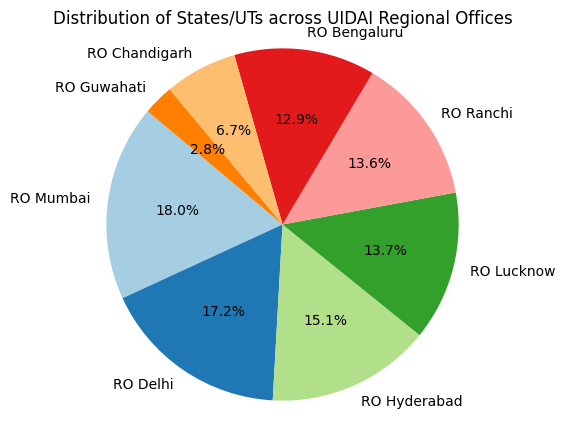

In [ ]:
zonal_counts = final_df.groupby('region')['updates'].sum().reset_index().sort_values('updates', ascending=False)
print(zonal_counts)
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired(range(len(zonal_counts)))
plt.pie(zonal_counts['updates'], labels=zonal_counts['region'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of States/UTs across UIDAI Regional Offices')
plt.axis('equal')